The main objective of this activity is to provide an initial experience trying different optimization strategies. We'll train a Neural Network to identify the numbers of MNIST dataset. The students will assess the convergence of the network using different optimizers parameters.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

In [ ]:
num_classes = 10
# Dataset normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train= x_train/255.
x_test = x_test/255.
# One-hot encoding
y_train_h = np.zeros((np.size(y_train,0) , num_classes))
y_test_h = np.zeros((np.size(y_test,0) , num_classes))
for i in range(np.size(y_train , 0)):
  y_train_h[i , y_train[i]] = 1

for i in range(np.size(y_test , 0)):
  y_test_h[i , y_test[i]] = 1


Model creation

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, 'sigmoid'))
model.add(tf.keras.layers.Dense(512, 'relu'))
model.add(tf.keras.layers.Dense(256, 'relu'))
model.add(tf.keras.layers.Dense(10, 'sigmoid'))

In [ ]:
#inputs = tf.keras.Input(shape=(784,))
#x = tf.keras.layers.Dense(256, activation="relu")(inputs)
#x = tf.keras.layers.Dense(512, activation="relu")(x)
#x = tf.keras.layers.Dense(256, activation="relu")(x)
#outputs = tf.keras.layers.Dense(10, activation="sigmoid")(x)
#model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
lr = 0.01
momentum = 0.01
nest = False#True

optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov = nest)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)

loss = tf.keras.losses.CategoricalCrossentropy()

metrics = [
           'accuracy'
]

batch_size = 128
epochs = 50

In [ ]:
model.compile(
    optimizer=optimizer,
    loss = loss,
    metrics = metrics
)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=1,
    mode='max',
    restore_best_weights=True,
)
callbacks = [early_stop]

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train_h,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2,
    callbacks = callbacks
)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 2.0865 - accuracy: 0.4534 - val_loss: 1.8097 - val_accuracy: 0.6516
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 1.4211 - accuracy: 0.7093 - val_loss: 1.0224 - val_accuracy: 0.7766
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.8461 - accuracy: 0.8038 - val_loss: 0.6679 - val_accuracy: 0.8371
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6184 - accuracy: 0.8395 - val_loss: 0.5220 - val_accuracy: 0.8654
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5141 - accuracy: 0.8611 - val_loss: 0.4505 - val_accuracy: 0.8781
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4566 - accuracy: 0.8731 - val_loss: 0.4116 - val_accuracy: 0.8827
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4202 - accuracy: 0.8817 - val_loss: 0.3815 - val_accuracy: 0.8914
Epoch 

In [ ]:
model.evaluate(
    x = x_test,
    y = y_test_h
)

313/313 [==============================] - 1s 3ms/step - loss: 0.1584 - accuracy: 0.9712


[0.15842440724372864, 0.9711999893188477]

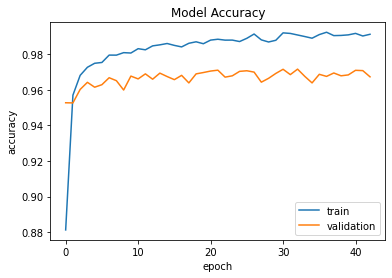

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

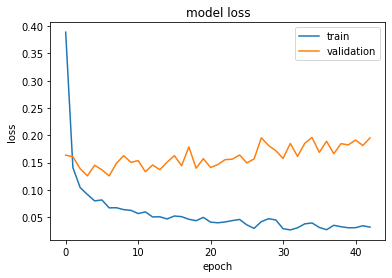

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Exercise:

Try other training parameters, following this table.

---

Student | Optimizer | Learning Rate
--------|------------|---------
Student 1            |SGD                | 0.01
Student 2    |SGD+Momentum       | 0.01
Student 3             |Nesterov Momentum  | 0.01
Student 4       |Adagrad            | 0.01
Student 5                        |RMSProp            | 0.01
Student 6               |Adam               | 0.01
Student 7                           |Adam               | 0.0001
Student 8             |Adam               | 0.1

---

Register your results in [here](https://docs.google.com/spreadsheets/d/1KjptUtmX8cSWZi7Z27zxCMs7TjZfhwAXCFiCXPNFMAk/edit?usp=sharing).